In [1]:
import astropy.coordinates as coord
import numpy as np
from gala.units import UnitSystem
from yellowcard.model import TimingArgumentModel 
from yellowcard.coordinates import fiducial_m31_c
import astropy.units as u
from scipy.optimize import minimize
import emcee
import arviz as az

import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size':22,'text.usetex':False})

In [3]:
model = TimingArgumentModel(distance = fiducial_m31_c.distance,
                            pm = u.Quantity([fiducial_m31_c.pm_ra_cosdec, fiducial_m31_c.pm_dec]),
                            radial_velocity = fiducial_m31_c.radial_velocity,
                            tperi = 13.7*u.Gyr,
                            distance_err = 10*u.kpc,
                            pm_err = u.Quantity([10*u.microarcsecond/u.yr, 10*u.microarcsecond/u.yr]),
                            radial_velocity_err = 10 * u.km / u.s,
                            tperi_err = .25 * u.Gyr,
                            )

In [4]:
e_init = 0.9
eta_init = 5*u.rad
galcen_m31 = fiducial_m31_c.transform_to(model.galcen_frame)
galcen_m31_pos = galcen_m31.data.without_differentials()
galcen_m31_vel = galcen_m31.velocity
galcen_m31_L   = galcen_m31_pos.cross(galcen_m31_vel)
galcen_m31_L   = galcen_m31_L / galcen_m31_L.norm()

In [5]:
fiducial_m31_c.distance.value/(1-e_init*np.cos(eta_init))

<Quantity 981.59801414>

In [6]:
init_par = {}

init_par['a'] = fiducial_m31_c.distance.value/(1-e_init*np.cos(eta_init))
init_par['ecoseta'] = e_init*np.cos(eta_init)
init_par['esineta'] = e_init*np.sin(eta_init)
init_par['M'] = (4e12*u.Msun).decompose(model.unit_system).value
init_par['Lhatlg'] = galcen_m31_L.xyz

In [7]:
galcen_m31_vel

<CartesianDifferential (d_x, d_y, d_z) in km / s
    (41.58355717, -120.5840702, -6.39089485)>

In [13]:
model.ln_likelihood(init_par)

170.4685673829579 km / s 21.980534235151605 km / s
727.0555622608491 kpc


-1522.479718165792

In [14]:
galcen_m31_L.xyz

<Quantity [-0.83720219, -0.3124973 ,  0.44881838]>

In [15]:
aSlice = np.linspace(500,5000, 100)
eSlice = np.linspace(0.1,0.99, 100)
etaSlice = np.linspace(0, 2*np.pi,100)
MSlice = np.linspace(1,15, 100)*1e12


# parameters = ['a','e','eta','M']
# slices = [aSlice, eSlice, etaSlice, MSlice]
# lnlike_a, lnlike_e, lnlike_eta, lnlike_M = [], [], [], []
# likeli_param = [lnlike_a, lnlike_e, lnlike_eta, lnlike_M]

In [16]:
lnlike_a = []
init_a = {}

for a in aSlice:
    
    init_a['a'] = a
    init_a['ecoseta'] = e_init*np.cos(eta_init)
    init_a['esineta'] = e_init*np.sin(eta_init)
    init_a['M'] = (4e12*u.Msun).decompose(model.unit_system).value
    init_a['Lhatlg'] = galcen_m31_L.xyz
    
    lnlike_a.append(model.ln_likelihood(init_a))

238.85049449481056 km / s 30.79782714153868 km / s
368.3741839901737 kpc
228.6819381303376 km / s 29.486674565303005 km / s
402.23003996186014 kpc
219.71049936828078 km / s 28.329880559960362 km / s
436.08502303170997 kpc
211.7183347760096 km / s 27.299355988009594 km / s
469.93932029778836 kpc
204.53934355433447 km / s 26.373683503372636 km / s
503.79306895102263 kpc
198.0443678075337 km / s 25.536209246676883 km / s
537.6463718760538 kpc
192.13125812450235 km / s 24.773761882805452 km / s
571.4993077440748 kpc
186.71802060334642 km / s 24.07576896549844 km / s
605.351937740408 kpc
181.73797591798714 km / s 23.433632738394394 km / s
639.2043101670348 kpc
177.13626759144654 km / s 22.840279905291275 km / s
673.0564636640471 kpc
172.86729646432352 km / s 22.28983082573868 km / s
706.9084295104941 kpc
168.89280434704068 km / s 21.77735241759309 km / s
740.7602332976063 kpc
165.1804212427667 km / s 21.298670833238745 km / s
774.6118961654537 kpc
161.70254918684424 km / s 20.85022753976666

In [19]:
lnlike_e = []
init_e = {}

for e in eSlice:
    init_e['a'] = fiducial_m31_c.distance.value/(1-e*np.cos(eta_init))
    init_e['ecoseta'] = e*np.cos(eta_init)
    init_e['esineta'] = e*np.sin(eta_init)
    init_e['M'] = (4e12*u.Msun).decompose(model.unit_system).value
    init_e['Lhatlg'] = galcen_m31_L.xyz    
    
    lnlike_e.append(model.ln_likelihood(init_e))
    

149.2398697660029 km / s 43.92579096919099 km / s
727.0555622608491 kpc
149.43609931916515 km / s 43.941791963396646 km / s
727.0555622608491 kpc
149.63310495667815 km / s 43.95426921636635 km / s
727.0555622608491 kpc
149.83089180773334 km / s 43.96319781430393 km / s
727.0555622608491 kpc
150.02946504910688 km / s 43.96855171231339 km / s
727.0555622608491 kpc
150.2288299057285 km / s 43.97030371051006 km / s
727.0555622608491 kpc
150.42899165125925 km / s 43.968425428521186 km / s
727.0555622608491 kpc
150.62995560867705 km / s 43.962887278308635 km / s
727.0555622608491 kpc
150.83172715087164 km / s 43.953658435237756 km / s
727.0555622608491 kpc
151.0343117012476 km / s 43.94070680731203 km / s
727.0555622608491 kpc
151.23771473433678 km / s 43.92399900248607 km / s
727.0555622608491 kpc
151.44194177641955 km / s 43.9035002939608 km / s
727.0555622608491 kpc
151.64699840615563 km / s 43.879174583359514 km / s
727.0555622608491 kpc
151.85289025522388 km / s 43.850984361673035 km / 

In [20]:
lnlike_eta = []
init_eta = {}

for eta in eSlice:
    init_eta['a'] = fiducial_m31_c.distance.value/(1-e_init*np.cos(eta))
    init_eta['ecoseta'] = e_init*np.cos(eta)
    init_eta['esineta'] = e_init*np.sin(eta)
    init_eta['M'] = (4e12*u.Msun).decompose(model.unit_system).value
    init_eta['Lhatlg'] = galcen_m31_L.xyz    
    
    lnlike_eta.append(model.ln_likelihood(init_eta))
    

-47.378077138932916 km / s 205.82740352408038 km / s
727.0555622608491 kpc
-51.41394610050109 km / s 204.80807415527832 km / s
727.0555622608491 kpc
-55.395436691195926 km / s 203.71431933474318 km / s
727.0555622608491 kpc
-59.319324018464684 km / s 202.54908891850295 km / s
727.0555622608491 kpc
-63.18263688960553 km / s 201.31544728367132 km / s
727.0555622608491 kpc
-66.98266202787725 km / s 200.01655231512314 km / s
727.0555622608491 kpc
-70.71694600799394 km / s 198.65563471601556 km / s
727.0555622608491 kpc
-74.38329503241862 km / s 197.2359778664894 km / s
727.0555622608491 kpc
-77.97977269468394 km / s 195.76089842948466 km / s
727.0555622608491 kpc
-81.50469589568573 km / s 194.2337278752839 km / s
727.0555622608499 kpc
-84.95662909350196 km / s 192.6577950680542 km / s
727.0555622608491 kpc
-88.33437707694986 km / s 191.03641002910902 km / s
727.0555622608491 kpc
-91.63697645809467 km / s 189.3728489636076 km / s
727.0555622608491 kpc
-94.86368607965325 km / s 187.670340610

In [21]:
lnlike_M = []
init_M = {}

for M in MSlice:
    init_M['a'] = fiducial_m31_c.distance.value/(1-e*np.cos(eta))
    init_M['ecoseta'] = e_init*np.cos(eta_init)
    init_M['esineta'] = e_init*np.sin(eta_init)
    init_M['M'] = (M*u.Msun).decompose(model.unit_system).value
    init_M['Lhatlg'] = galcen_m31_L.xyz    
    
    lnlike_M.append(model.ln_likelihood(init_M))

66.75504643880521 km / s 8.60751988559261 km / s
1187.7987765394487 kpc
71.31907910756185 km / s 9.196014749285494 km / s
1187.7987765394487 kpc
75.60810713444879 km / s 9.749050002809527 km / s
1187.7987765394487 kpc
79.66655938446135 km / s 10.272354386677112 km / s
1187.7987765394487 kpc
83.5280521972201 km / s 10.770262454262136 km / s
1187.7987765394487 kpc
87.21874983949925 km / s 11.246147874801082 km / s
1187.7987765394487 kpc
90.75949065121935 km / s 11.702697582613037 km / s
1187.7987765394487 kpc
94.16719154234343 km / s 12.142092875542547 km / s
1187.7987765394487 kpc
97.45580938392546 km / s 12.56613337851008 km / s
1187.7987765394487 kpc
100.63701904557607 km / s 12.97632447092433 km / s
1187.7987765394487 kpc
103.72070392203891 km / s 13.373940536091585 km / s
1187.7987765394487 kpc
106.71531868380883 km / s 13.760071734955364 km / s
1187.7987765394487 kpc
109.62816272058245 km / s 14.135659264403692 km / s
1187.7987765394487 kpc
112.46558976502158 km / s 14.501522386547

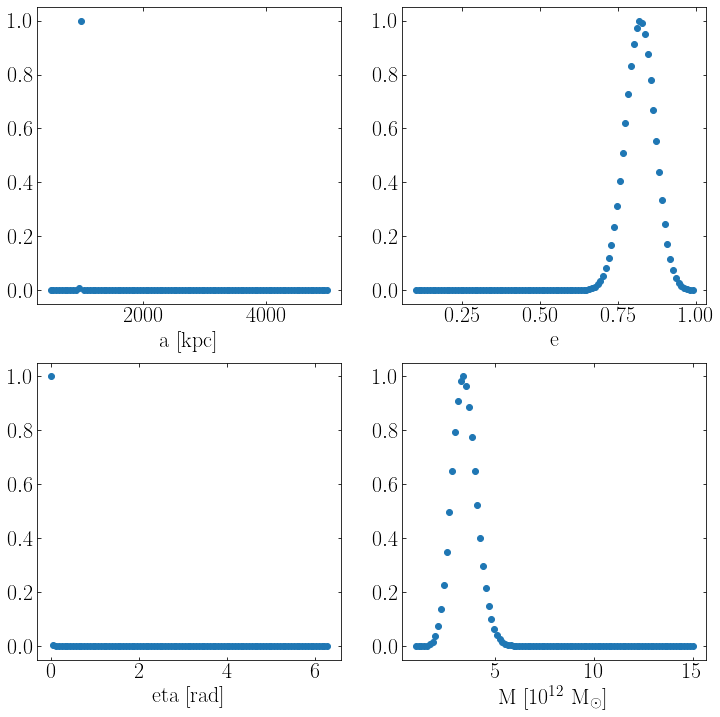

In [22]:
fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0][0].scatter(aSlice, np.exp(lnlike_a-np.max(lnlike_a)))
ax[0][1].scatter(eSlice, np.exp(lnlike_e-np.max(lnlike_e)))
ax[1][0].scatter(etaSlice, np.exp(lnlike_eta-np.max(lnlike_eta)))
ax[1][1].scatter(MSlice/1e12, np.exp(lnlike_M-np.max(lnlike_M)))
ax[0][0].set_xlabel(r"a [kpc]")
ax[0][1].set_xlabel(r"e")
ax[1][0].set_xlabel(r"eta [rad]")
ax[1][1].set_xlabel(r"M [10$^{12}$ M$_{\odot}$]")
plt.show()

In [38]:

model.ln_likelihood(init_par)

-1951.894816107098

In [17]:
model(model.pack_pars(init_par))

-1655.8151254880688

In [8]:
model.pack_pars(init_par)

<Quantity [ 8.51813663e+02,  1.41831093e-01, -4.79462137e-01,
            4.00000000e+00, -8.37202186e-01, -3.12497297e-01,
            4.48818381e-01]>

In [9]:
result = minimize( lambda *args: -model(*args), model.pack_pars(init_par), method='Powell')


/Users/katiechambe/Documents/Research/projects/yellowCard/yellowcard/keplerianPlane.py:61: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.arctan( np.sqrt(A) * B )

/Users/katiechambe/Documents/Research/projects/yellowCard/yellowcard/keplerianPlane.py:53: RuntimeWarning: invalid value encountered in double_scalars
  B = ( 1 - self.e**2 )**(1/2)

/Users/katiechambe/miniconda3/envs/BADS/lib/python3.9/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)

/Users/katiechambe/miniconda3/envs/BADS/lib/python3.9/site-packages/scipy/optimize/optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1



In [10]:
result

   direc: array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
     fun: 1508.7601499200832
 message: 'Optimization terminated successfully.'
    nfev: 348
     nit: 4
  status: 0
 success: True
       x: array([ 1.00323417e+03,  2.70357790e-01, -9.45846219e-01,  1.62525833e+00,
       -9.02402513e-01, -3.34831512e-01,  4.87760474e-01])

In [11]:
model.unpack_pars(result.x)

{'a': array(1003.2341672),
 'ecoseta': array(0.27035779),
 'esineta': array(-0.94584622),
 'M': array(1.62525833),
 'Lhatlg': array([-0.90240251, -0.33483151,  0.48776047])}

In [12]:
init_par

{'a': <Quantity 981.59801414>,
 'ecoseta': <Quantity 0.25529597>,
 'esineta': <Quantity -0.86303185>,
 'M': 3.999999999999999,
 'Lhatlg': <Quantity [-0.83720219, -0.3124973 ,  0.44881838]>}

In [13]:
sampler = emcee.EnsembleSampler(nwalkers = 8*len(result.x), ndim=len(result.x), log_prob_fn=model)

In [14]:
sampler_x0 = np.random.normal(result.x, 1e-2, size=(sampler.nwalkers,len(result.x)))

In [ ]:
state = sampler.run_mcmc(sampler_x0, 2000, progress=True)  # burn in
sampler.reset()
state = sampler.run_mcmc(state, 2000, progress=True)

  0%|                                                  | 0/2000 [00:00<?, ?it/s]

/Users/katiechambe/miniconda3/envs/BADS/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]



  4%|█▊                                       | 89/2000 [01:20<28:48,  1.11it/s]

/Users/katiechambe/miniconda3/envs/BADS/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)



 54%|████████████████████▉                  | 1071/2000 [16:34<16:05,  1.04s/it]

/Users/katiechambe/miniconda3/envs/BADS/lib/python3.9/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)



100%|███████████████████████████████████████| 2000/2000 [31:35<00:00,  1.05it/s]


(-3.141592653589793, 3.141592653589793)

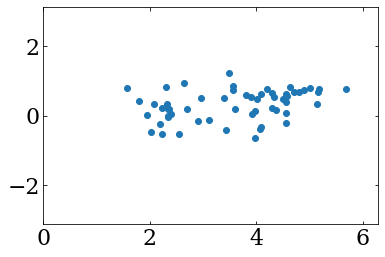

In [29]:
last_pars = model.unpack_pars(sampler.chain[:, -1].T)
last_Lhatlg = coord.CartesianRepresentation(last_pars['Lhatlg'])
last_Lhatlg_sph = last_Lhatlg.represent_as(coord.UnitSphericalRepresentation)
plt.scatter(last_Lhatlg_sph.lon, last_Lhatlg_sph.lat)
plt.xlim(0, 2*np.pi)
plt.ylim(-np.pi, np.pi)

In [16]:
tulips = az.from_emcee(sampler)

array([[<AxesSubplot:title={'center':'var_0'}>,
        <AxesSubplot:title={'center':'var_0'}>],
       [<AxesSubplot:title={'center':'var_1'}>,
        <AxesSubplot:title={'center':'var_1'}>],
       [<AxesSubplot:title={'center':'var_2'}>,
        <AxesSubplot:title={'center':'var_2'}>],
       [<AxesSubplot:title={'center':'var_3'}>,
        <AxesSubplot:title={'center':'var_3'}>],
       [<AxesSubplot:title={'center':'var_4'}>,
        <AxesSubplot:title={'center':'var_4'}>],
       [<AxesSubplot:title={'center':'var_5'}>,
        <AxesSubplot:title={'center':'var_5'}>],
       [<AxesSubplot:title={'center':'var_6'}>,
        <AxesSubplot:title={'center':'var_6'}>]], dtype=object)

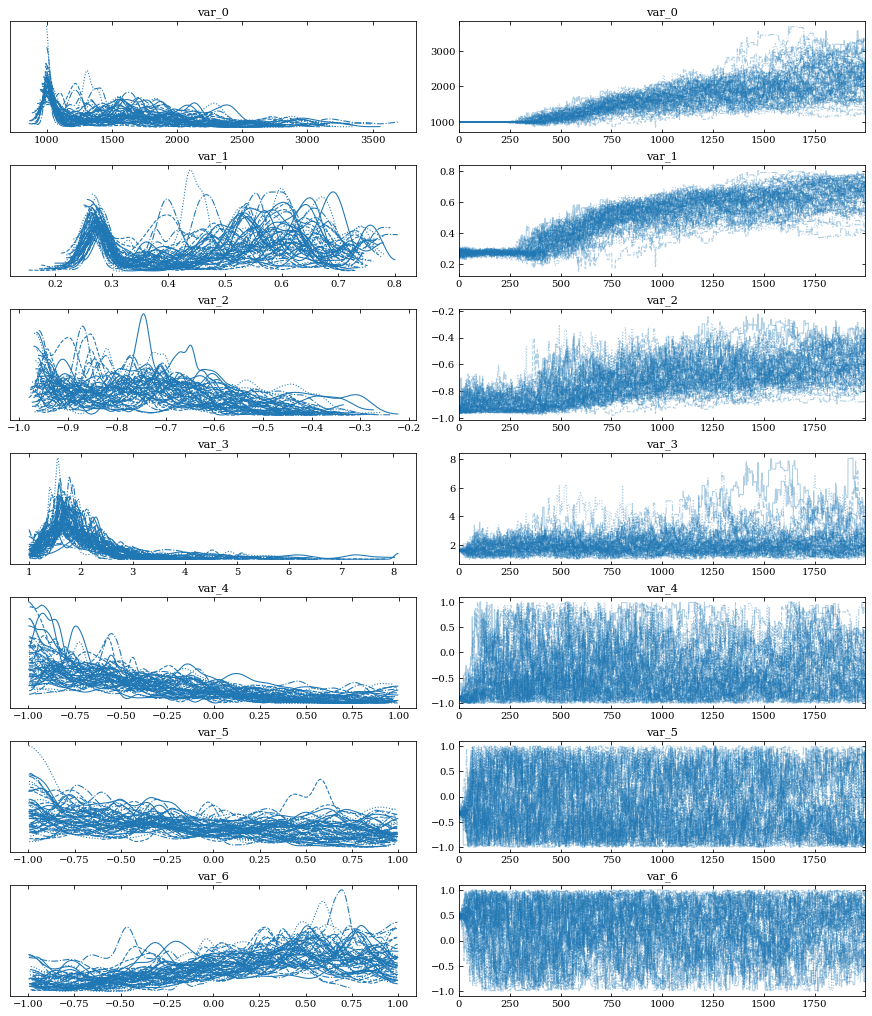

In [17]:
az.plot_trace(tulips)


In [57]:
Ls = []
for i in range(1000):
    pma = np.random.normal(fiducial_m31_c.pm_ra_cosdec.to_value(u.microarcsecond/u.yr), 10.)
    pmd = np.random.normal(fiducial_m31_c.pm_dec.to_value(u.microarcsecond/u.yr), 10.)
    rv = np.random.normal(-300, 10)
    dist = np.random.normal(731, 50)
    c = coord.SkyCoord(fiducial_m31_c.ra, fiducial_m31_c.dec,
                       distance=dist*u.kpc,
                       pm_ra_cosdec=pma*u.microarcsecond/u.yr,
                       pm_dec=pmd*u.microarcsecond/u.yr,
                       radial_velocity=rv*u.km/u.s)
    tmp = c.transform_to(coord.Galactocentric())
    
    L = tmp.data.without_differentials().cross(tmp.velocity)
    L = L / L.norm()
    Ls.append(L.xyz)
Ls = np.array(Ls)

In [58]:
np.std(Ls, axis=0)

array([0.32032377, 0.28110151, 0.46647454])

In [59]:
shit = coord.CartesianRepresentation(*Ls.T).represent_as(coord.UnitSphericalRepresentation)

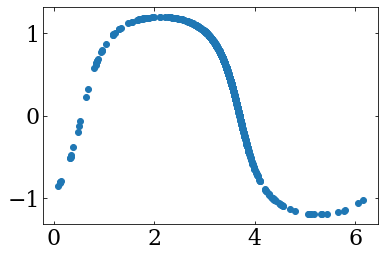

In [60]:
plt.scatter(shit.lon, shit.lat)